## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 3</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:00 pm, Monday, 03 October, 2022 </center></h1>
#### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.

# **Question 1** (Monte-Carlo approximation) (30+)

1. Write a Python program to estimate pi using Monte-Carlo approximation. Report a number of samples that allow you to obtain 2 digits of accuracy for pi. Hint: Drawing independently $x^i$, $x^i$ fron uniform distribution $\mathcal{U}[0,1]$. Probability of points inside the circile of radius of 1 is $\pi/4$.

2. Notice that using elementary calculus the area of the first quarter of or a disk of radius $1$ can also be computed as
$$ \frac{\pi}{4} = \int_0^1 \sqrt{1-x^2} dx = E[\sqrt{1-X^2}]$$
where X is the uniform random variable U [0, 1]. Describe how you are going to use the Monte-Carlo to estimate $\pi/4$ in this case. Write a Python code to estimate π. Report a number of samples that allow you to obtain 2 digits of accuracy for $\pi$.

3. Compare to the preceding methods, which approach converges faster (i.e. you get a smaller N)? Explain your answer. 

Hint: use need to run a few hunreds of random seed cases and for each random seed drawing about 10000 samples. Then, compute the expectation (average over random seed cases the estimated $\pi$) and variance of each method. from that you can explain correctly. 

In [431]:
#2.1
import numpy as np
N = 10000
np.random.seed(0)
    
X = np.random.uniform(0,1,N)
Y = np.random.uniform(0,1,N)
j = 0
Z = []
tolerance = 0.001
pi_actual = 3.142


for i in range (N) :
    
    if X[i]**2+ Y[i]**2 <=1: #Here I am counting the 
        #points inside the circle
        j = j+1
    pi = j*4/(i+1) #Here I am calculating ratio of points 
    #inside the circle versus total points
    if abs(pi-pi_actual) < tolerance :
        break

print("Last pi value :", pi)
print("Value at which two digit accuracy is achieved :" , i)
#i denotes the first time we get a 
#value inside the tolerance level

Last pi value : 3.142857142857143
Value at which two digit accuracy is achieved : 97


In [432]:
#2.2
import numpy as np
import math

N = 10000
np.random.seed(0)
X = np.random.uniform(0,1,N)
y = []
tolerance = 0.001
pi_actual = 3.142
for i in range (N) :
    #Here I am calculating values of all (1-x^2)
    y.append(math.sqrt(1-(X[i]*X[i]))) 
    pi = np.mean(y)*4  #And then calculating mean of them, 
    #because it is a Monte Carlo estimate
    
    if abs(pi-pi_actual) < tolerance :
        break
    

print("Last pi value :", pi)
print("Value at which two digit accuracy is achieved :" , i) 
#i denotes the first time we get a 
#value inside the tolerance level

Last pi value : 3.14128262364187
Value at which two digit accuracy is achieved : 154


In [433]:
#2.3a
import numpy as np
N = 10000

j = 0
Z = []
pi_actual = 3.142
k = 100

for m in range (k) :
    j = 0
    np.random.seed(m) #creating 100 seed samples
    X = np.random.uniform(0,1,N)
    Y = np.random.uniform(0,1,N)
    for i in range (N) :
        if X[i]**2+ Y[i]**2 <=1:
            j = j+1
    pi = j*4/N
    Z.append(pi) #Calculating pi for every seed sample

#using all the pi values to 
#generate mean and variance in samples
print("Expected Value :", np.mean(Z))
print("Variance :", np.var(Z))
print("Last pi value :", pi)

Expected Value : 3.142804
Variance : 0.0003768015840000007
Last pi value : 3.1048


In [434]:
#2.3b
import numpy as np
N = 10000

j = 0
Z = []
pi_actual = 3.142
k = 100
y = []
for m in range (k) :
    j = 0
    np.random.seed(m) #creating 100 seed samples
    X = np.random.uniform(0,1,N) 
    for i in range (N) :
        y.append(math.sqrt(1-(X[i]*X[i])))
    pi = np.mean(y)*4
    Z.append(pi) #Calculating pi for every seed sample

#using all the pi values to 
#generate mean and variance in samples
print("Expected Value :", np.mean(Z))
print("Variance :", np.var(Z))
print("Last pi value :", pi)

Expected Value : 3.143170819177816
Variance : 4.61258455183316e-06
Last pi value : 3.1426165812139013


In [435]:
#Clearly expected value of pi in both parts 
#achieve 2 digit accuracy 
#and the variance across mutiple seed
#samples is very less in method 2, so it clearly converges
#better and we don't need to create these many seed
#samples to compute accurate pi
#Second part will also converge faster because we are
#estimating Expected value (Monte Carlo) and computing
#mean while in first part, we are only selecting number of points
#inside the quarter of the circle

## **Question 2** (Probabilistic regression) (50+)

1.) Consider $y = f(x) = a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0$, and you pick $(a_0,a_1,a_2, a_3, a_4)$ (See Homework 2 problem 1 as a reference). First, you generate some N (you pick N) noisy data samples by
- Draw gaussian samples $x^i \sim \mathcal{N}(0, 2)$
- Generate noisy y, i.e., $y^i = f(x^i) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$, and you pick small noise level $\delta$

2.a) Similar to the Lecture 5.b, but now choose the Gaussian likelihood model with polynomial regression of order $10$ for conditional distribution of $y$ given $x$ and $\theta$
$$p(y | x; \theta).$$
Here we choose $\sigma = \delta$. From N samples $(x^i, y^i)$, derive the optimal $\theta^*$ by the maximum conditional likelihood function approach.

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

#Taken a random function
def func(X) : 
    return 1+(2*X)+(3*(X**2))+(4*(X**3))+(-5*(X**4))
A = 50
#considered many noise levels and then selected 10
noise_level = 10
np.random.seed(0)
#Generated x values
X = np.sort(np.random.normal(0, 2, A))
#Generated y values after generating noise
Y = func(X) + np.random.normal(0, noise_level**2 , A)

Xmat = np.ones((A,11))

for i in range (A) :
    for j in range(11) : 
        Xmat[i][j] = X[i]**j
        
#2.a.1 done in handwritten part       
theta_best = np.linalg.inv(Xmat.T.dot(Xmat)).dot(Xmat.T).dot(Y)
print("Optimal theta values :" , theta_best)

Optimal theta values : [-1.61712307e+01  4.57228876e+01 -3.06448439e+01 -7.58028143e+00
  1.52985612e+01  1.14905891e+00 -3.25676261e+00 -1.72553127e-02
  1.98630905e-01 -1.09990285e-03 -4.02940656e-03]


2.b) Determine the mean of conditional distribution $p(y | x; \theta^*)$
as function of x and then plotting this mean together with the training data.

2.c) Find the variance of conditional distribution $$p(y | x; \theta^*)$$
Then, plot ($y \pm \sigma$) curve on top of your figure in 2.b).

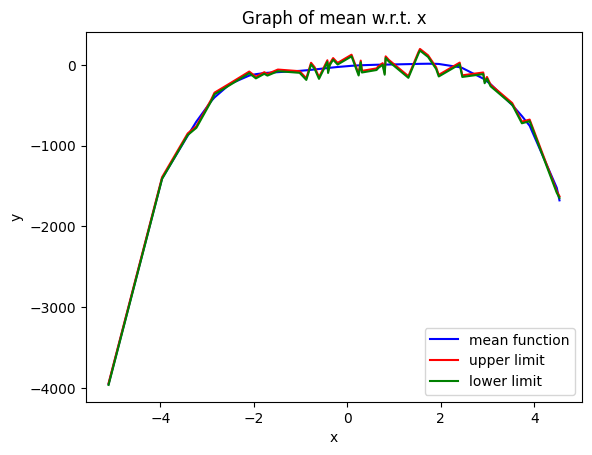

In [146]:
import matplotlib.pyplot as plt

F =50
meandash = np.zeros(F)
theta = theta_best
#mean = x.dot(theta) as we can see for a gaussian distribution
#is just a normal distribution and the objective function is
#very similar to Mean Squared Error
#explained in end of handwritten notes
def mean(B): 
    A = []
    for i in range(11) :
        A.append(theta[i]*(B**i))
    return np.sum(A)
    
for i in range(F) :
    meandash[i] = mean(X[i])

#Variance will be sigma = noise_squared, as mentioned
#in the question because gaussian distribution
#is just a normal distribution and the objective function is
#very similar to Mean Squared Error
#explained in end of handwritten notes
#Plots for mean and y+/- sigma are shown
sigma = noise_level
#variance = noise_level**2

plt.title("Graph of mean w.r.t. x")

plt.plot(X, meandash, color='b', label='mean function')
plt.plot(X, Y + sigma, color='r', label='upper limit')
plt.plot(X, Y - sigma, color='g', label='lower limit')

plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title("Graph of mean w.r.t. x")

plt.legend(loc="lower right")

2.d) This question is for gererating the testing data and plotting them. Draw $x^i \sim \mathcal{N}(0, 2)$, for $i=1,...,50$, and then compute $y^i = f_{\theta^*}(x^i) + \epsilon$. Plotting these 50 pairs $(x^i, y^i)$ in the same figure. What is the percentage of points that are within the uncertainty band? Discuss the result.

Percentage of points inside the uncertain band : 0.0
Percentage of points outside the uncertain band : 100.0


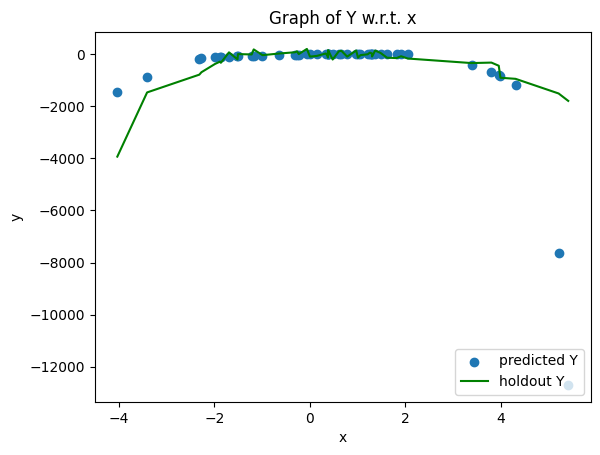

In [147]:
import numpy as np
import matplotlib.pyplot as plt
#generating new data
np.random.seed(101)
X_holdout = np.sort(np.random.normal(0, 2, 50))
noise_level = 5
ypred = np.zeros(50)
theta = theta_best

def func(X) : 
    return 1+(2*X)+(3*(X**2))+(4*(X**3))+(-5*(X**4))

#generating new y_holdout
Y_holdout = func(X) + np.random.normal(0, sigma**2 , 50)

def function(B): 
    C = []
    for i in range(11) :
        C.append(theta[i]*(B**i))
    return np.sum(C)


#predicting new y for holdout data
for i in range(50) :
    
    ypred[i] = function(X_holdout[i])


#plotting predicted points and the holdout points
plt.scatter(X_holdout,ypred, label='predicted Y')
plt.plot(X_holdout, Y_holdout, color='g', label='holdout Y')

#calculating number of uncertainity band points by assuming that 
#the uncertainity band is between +/- sigma
l = 0
for i in range (50) :
    if abs(ypred[i]-Y_holdout[i]) > sigma :
        l=l+1
        
uncertainity_points = l/50*100
print("Percentage of points inside the uncertain band :", 100-uncertainity_points)
print("Percentage of points outside the uncertain band :", uncertainity_points)

#Since there are ideally 68% points in a normal distribution 
#in the range +/-sigma and here no points in 
#that region when used holdout samples, it was expected
#because we are clearly overfitting  because we are using samples from
#four degree polynomial to fit a 10 degree polynomial

plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title("Graph of Y w.r.t. x")

plt.legend(loc="lower right")

3.a) From N samples $(x^i, y^i)$, finding the optimal $\theta^*$ by optimizing the model using the MAP approach (see Lecture 5b and you need to derive MAP function). The variance for prior Gaussian distribution of $\theta$ should be a reasonable value (it has the same meaning as the regularization parameter)

3.b.c.d) reapeating steps 2.b.c.d, then discuss the difference. 

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

#Taken the same random function
def func(X) : 
    return 1+(2*X)+(3*(X**2))+(4*(X**3))+(-5*(X**4))
A = 50
#considered many noise levels and then selected 5
noise_level = 10
np.random.seed(0)
#Generated x values
X = np.sort(np.random.normal(0, 2, A))
#Generated y values after generating noise
Y = func(X) + np.random.normal(0, sigma**2 , A)

Xmat = np.ones((A,11))

for i in range (A) :
    for j in range(11) : 
        Xmat[i][j] = X[i]**j

#considered many tau values and then selected 0.01      
tau = 0.0005

#3.a.1 done in handwritten part       
theta_best = np.linalg.inv(Xmat.T.dot(Xmat)+(sigma/tau)**2*np.identity(11)).dot(Xmat.T).dot(Y) 

print("Optimal theta values :" , theta_best)

Optimal theta values : [-7.25999922e-06  1.42355773e-05 -5.16810784e-05  1.16520844e-04
 -4.80421725e-04  1.06876943e-03 -4.50902103e-03  8.31060820e-03
 -3.50237876e-02  2.43153237e-04  1.12985677e-03]


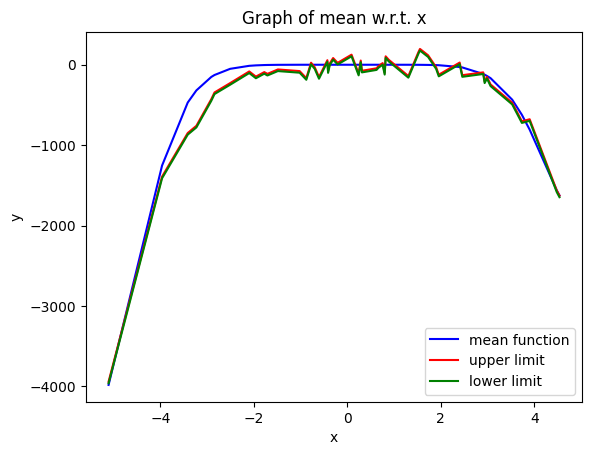

In [149]:
import matplotlib.pyplot as plt
F =50
meandash = np.zeros(F)
theta = theta_best
#mean = x.dot(theta) as we can see for a gaussian distribution
#is just a normal distribution and the objective function is
#very similar to Mean Squared Error
#The mean will not be affected by the prior term, because it
#acts as a regularised term which can
#be considered as the one to penalise the parameters
#explained in end of handwritten notes
def mean(B): 
    A = []
    for i in range(11) :
        A.append(theta[i]*(B**i))
    return np.sum(A)
    
for i in range(F) :
    meandash[i] = mean(X[i])

#Variance will be sigma = noise_squared, because gaussian distribution
#is just a normal distribution and the objective function is
#very similar to Mean Squared Error
#explained in end of handwritten notes
#Plots for mean and y+/- sigma are shown
sigma = noise_level
#variance = noise_level**2
plt.plot(X, meandash, color='b', label='mean function')
plt.plot(X, Y + sigma, color='r', label='upper limit')
plt.plot(X, Y - sigma, color='g', label='lower limit')

plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title("Graph of mean w.r.t. x")

plt.legend(loc="lower right")

Percentage of points inside the uncertain band : 6.0
Percentage of points outside the uncertain band : 94.0


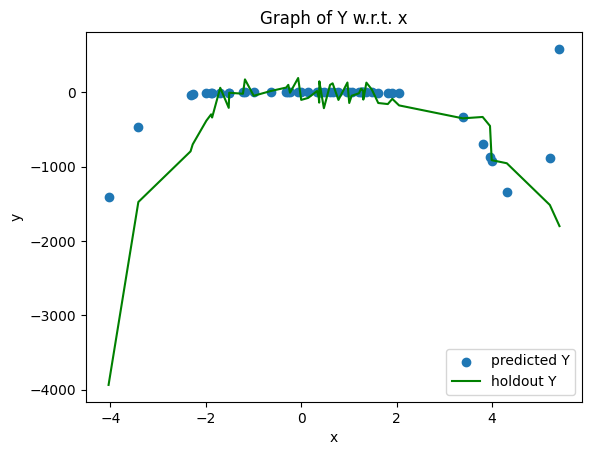

In [150]:
import numpy as np
import matplotlib.pyplot as plt
#generating new data
np.random.seed(101)
X_holdout = np.sort(np.random.normal(0, 2, 50))
noise_level = 5
ypred = np.zeros(50)
theta = theta_best

def func(X) : 
    return 1+(2*X)+(3*(X**2))+(4*(X**3))+(-5*(X**4))

#generating new y_holdout
Y_holdout = func(X) + np.random.normal(0, sigma**2 , A)

def function(B): 
    C = []
    for i in range(11) :
        C.append(theta[i]*(B**i))
    return np.sum(C)


#predicting new y for holdout data
for i in range(50) :
    
    ypred[i] = function(X_holdout[i])


#plotting predicted points and the holdout points
plt.scatter(X_holdout,ypred, label='predicted Y')
plt.plot(X_holdout, Y_holdout, color='g', label='holdout Y')

#calculating number of uncertainity band points by assuming that 
#the uncertainity band is between +/- sigma
l = 0
for i in range (50) :
    if abs(ypred[i]-Y_holdout[i]) > sigma :
        l=l+1
        
uncertainity_points = l/50*100
print("Percentage of points inside the uncertain band :", 100-uncertainity_points)
print("Percentage of points outside the uncertain band :", uncertainity_points)


#Since there are ideally 68% points in a normal distribution 
#in the range +/-sigma and here are only 6% in 
#that region when used holdout samples, it was expected
#because we are clearly overfitting  because we are using samples from
#four degree polynomial to fit a 10 degree polynomial
##In the occurrence of overfitting, we run into very large parameter values.
#To mitigate the effect of huge values, we can place the prior on the 
#parameter space, and seek new parameters to estimate the posterior distribution.
#This is visible from the fact that when compared to the previous method, more
#datapoints lie in the certain area
#The MAP method acts as a regularizing tool which helps decrease the overfitting.
#This is why more data lies in uncertain band in Case 2


plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title("Graph of Y w.r.t. x")

plt.legend(loc="lower right")